In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.regression import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
df = pd.read_csv("C:/Users/HP/Desktop/a.csv")

In [70]:
df.sort_values(by='market_value').head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
109,Eduardo Carvalho,Chelsea,34,LW,1,0.05,467,5.0,0.10%,0,2.0,Portugal,0,6,5,1,1
283,Joel Castro Pereira,Manchester+United,21,GK,4,0.10,395,4.0,1.00%,6,2.0,Portugal,0,1,12,1,0
157,Jonjoe Kenny,Everton,20,RB,3,0.25,53,4.5,0.20%,1,1.0,England,0,1,7,0,0
52,Niki Maenpaa,Brighton+and+Hove,32,GK,4,0.25,103,4.0,2.10%,0,2.0,Finland,0,5,3,0,0
176,Joe Lolley,Huddersfield,24,RW,1,0.25,63,4.5,0.10%,0,1.0,England,0,2,8,0,0


In [8]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


 # The above table describes the number of data, average,standard deviation, maximum and minimum value, values at the 25,50 and 75 percentile of each of the feature.

In [25]:
df.corr()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.086430,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.062474,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.101659,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.031055,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.082429,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.006712,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.086430,-0.062474,0.101659,0.031055,0.082429,-0.006712,1.000000,0.050903,0.089980,0.068671,0.039080,0.176746
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.050903,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.089980,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.068671,-0.002786,-0.004668,1.000000,-0.155667,0.134085


# The above table shows the correlation of each of the features with each other.

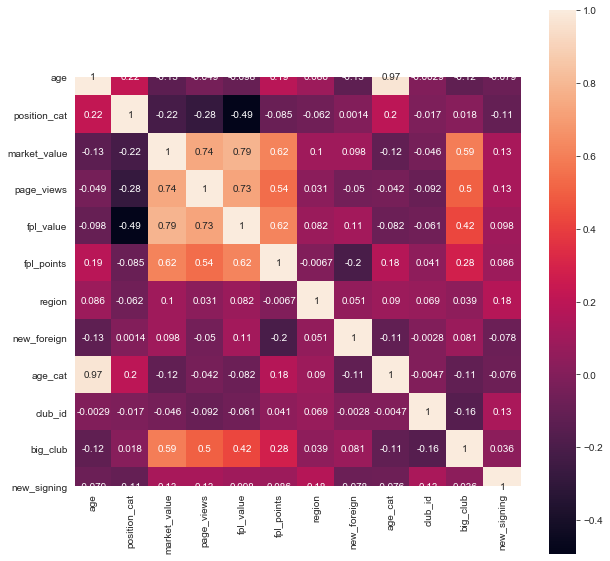

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, annot=True)

# The above plot is a heat map showing the correlation among the features.

Text(0.5, 1, 'PairPlot')

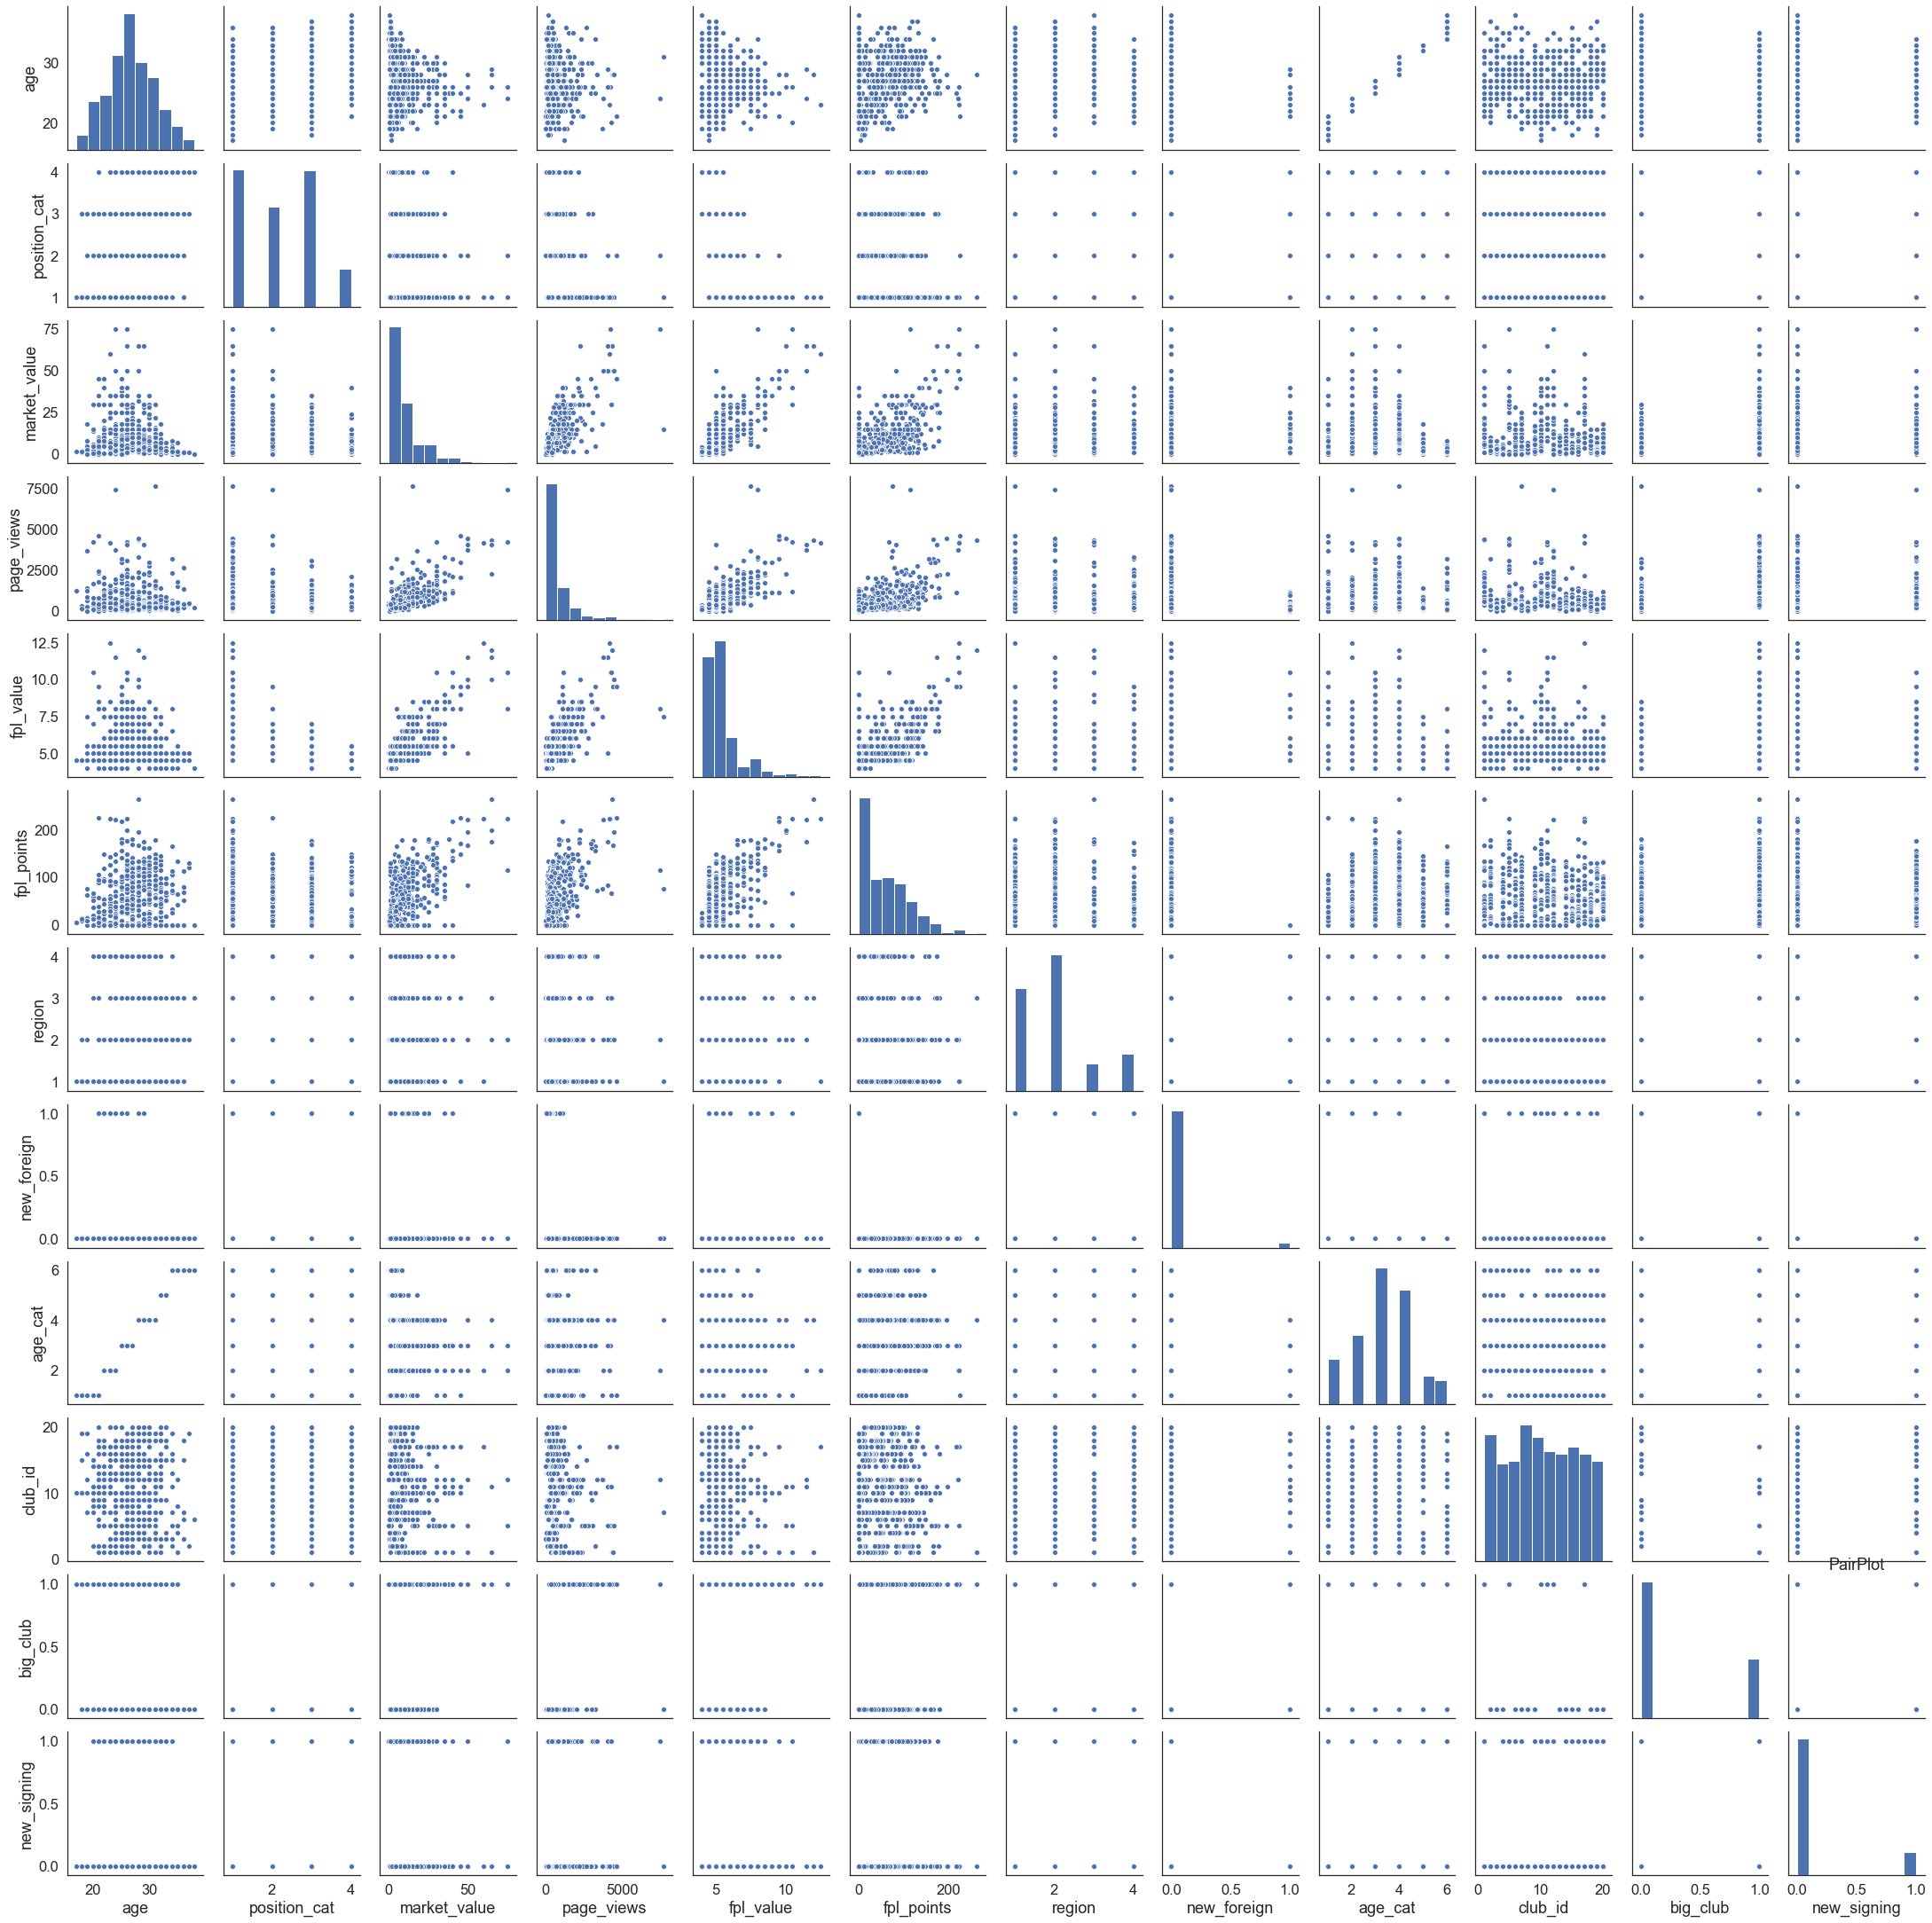

In [26]:
sns.set(style='white',font_scale=1.5)
sns.pairplot(df)
plt.savefig('pairplot1.png',transparent=True, bbox_inches='tight')
plt.title('PairPlot')

# From the correlation matrix and the pairplot it is inferred that only a few of the features are in correlation with the feature 'market value'. Age, position_cat,page_view,fpl_value,fpl_points,big_club correlate well with the feature 'market_value'.

# Features that donot correlate with the market_value are droped

In [71]:
df1=df.drop(['region','new_foreign','age_cat','club_id','new_signing','name','position','nationality'],axis = 1)


In [8]:
df1.head()

,club,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club
0,Arsenal,28,1,65.0,4329,12.0,17.10%,264,1
1,Arsenal,28,1,50.0,4395,9.5,5.60%,167,1
2,Arsenal,35,4,7.0,1529,5.5,5.90%,134,1
3,Arsenal,28,1,20.0,2393,7.5,1.50%,122,1
4,Arsenal,31,3,22.0,912,6.0,0.70%,121,1


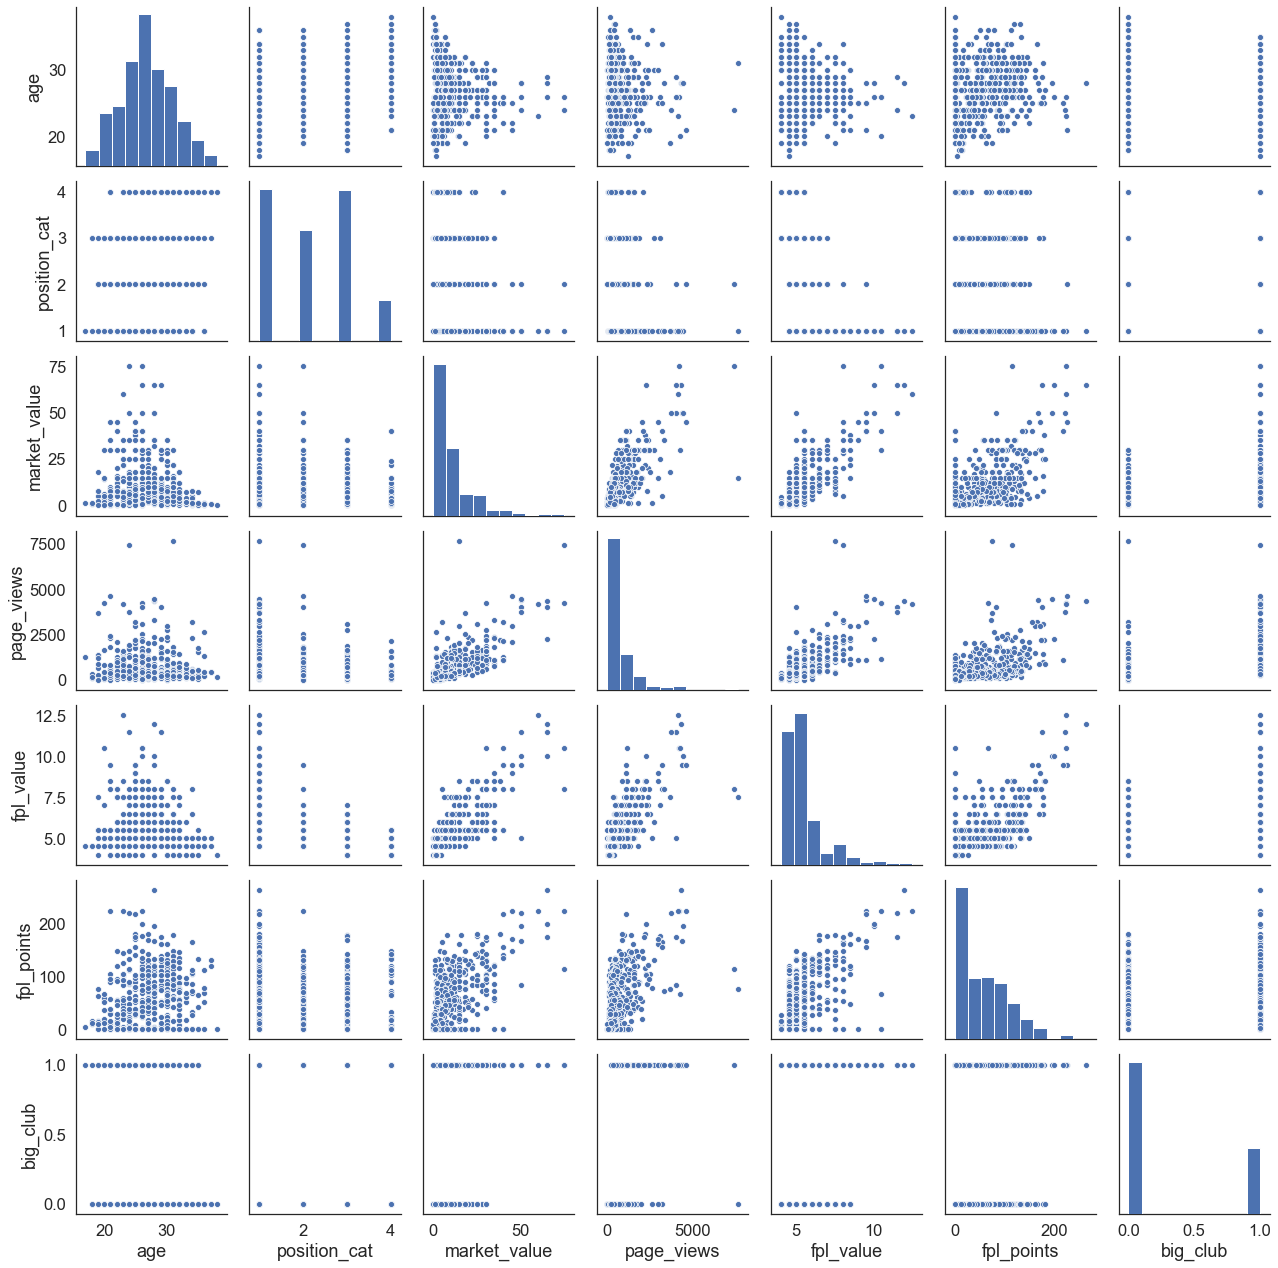

In [9]:
sns.set(style='white',font_scale=1.5)
sns.pairplot(df1)
plt.savefig('pairplot1.png',transparent=True, bbox_inches='tight')

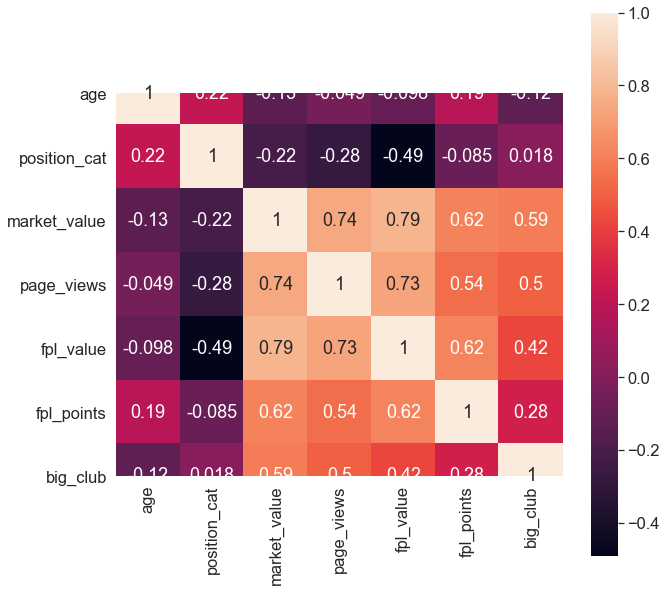

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), square=True, annot=True)

In [72]:
y = df1['market_value']


X = df1.drop(['market_value','club','fpl_sel'],axis = 1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 9 columns):
club            461 non-null object
age             461 non-null int64
position_cat    461 non-null int64
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
big_club        461 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 28.9+ KB


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [15]:
X_test

,age,position_cat,page_views,fpl_value,fpl_points,big_club
225,27,2,1236,5.5,73,1
30,30,3,185,5.0,134,0
39,30,1,140,5.0,64,0
222,23,2,1253,5.0,104,1
124,24,3,385,5.0,47,0
203,22,2,356,4.5,53,0
400,32,3,131,4.5,71,0
211,26,3,171,4.5,0,0
455,32,3,698,5.0,45,0
77,27,3,166,4.5,94,0


In [16]:
y_train

410     5.50
265    30.00
57      0.50
199     3.00
175     0.50
24      5.00
17     12.00
66      0.50
417     4.00
86      2.50
31      1.00
84      1.00
316    13.00
442    10.00
192     6.00
117     4.00
94     16.00
250     8.00
437     1.50
249    18.00
451    12.00
237    35.00
220    12.00
104    50.00
297     6.00
5      30.00
116     7.00
45      6.00
307    15.00
228     3.50
       ...  
21     15.00
313     5.00
160    10.00
276    12.00
191    10.00
385    12.00
293     5.00
413     1.00
343     3.00
257     8.00
308    20.00
149    20.00
130     6.00
151     2.00
359     5.00
99     30.00
372     0.25
87     10.00
330    15.00
214    45.00
121     7.00
460    10.00
20     10.00
188     5.50
71      3.50
106    25.00
270    18.00
348    15.00
435     1.50
102    18.00
Name: market_value, Length: 368, dtype: float64

# Feature Scaling


In [74]:

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)


# Cross Validation Set.

In [33]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# RIDGE REGRESSION

In [91]:
model = Ridge()

model = RidgeCV(alphas= np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model.fit(X_tr, y_train)


print('alpha: %f' % model.alpha_)



alpha: 0.990000


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Using Ridge CV the optimum value of alpha for Ridge Regression was estimated to be 0.99

In [92]:
ridge_model_final= Ridge(alpha = 0.9900)
a = ridge_model_final.fit(X_tr,y_train)
print(a.intercept_)
print(a.coef_)






Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train, cv=cv, scoring='r2'))
print('Mean r2 Ridge CV: %f' %Mean_R2_Ridge_CV)

Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train, cv=cv, scoring='r2'))
print('std r2 Ridge CV: %f' %Std_R2_Ridge_CV)

Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error Ridge CV: %f' %Mean_MAE_Ridge_CV)

Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute error Ridge CV: %f' %Std_MAE_Ridge_CV)


11.459375000000001
[-1.38961851  1.456358    2.63815769  5.75798445  2.3311509   2.80965041]
Mean r2 Ridge CV: 0.677391
std r2 Ridge CV: 0.144044
Mean of mean absolute error Ridge CV: 4.576968
std of Mean absolute error Ridge CV: 0.771391


In [94]:
Ridge_pred = a.predict(X_te)
error = np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred))
error

4.470242891917615

# The mean absolute error on CV set is 4.576 and RMSE on test set is 4.470


# LINEAR REGRESSION

In [85]:
lm = LinearRegression().fit(X_tr,y_train)
print(lm.intercept_)
print(lm.coef_)

11.459375000000001
[-1.39298085  1.47749666  2.6306649   5.79585985  2.32225749  2.80598684]


In [86]:
Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train, y_train, cv=cv, scoring='r2'))
print('Mean r2 Linear CV: %f' %Mean_R2_Linear_CV)

Std_R2_Linear_CV = np.std(cross_val_score(lm, X_train, y_train, cv=cv, scoring='r2'))
print('std r2 Linear CV: %f' %Std_R2_Linear_CV)

Mean_MAE_Linear_CV = -np.mean(cross_val_score(lm, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error Linear CV: %f' %Mean_MAE_Linear_CV)

Std_MAE_Linear_CV = np.std(cross_val_score(lm, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute Linear CV: %f' %Std_MAE_Linear_CV)


Mean r2 Linear CV: 0.677111
std r2 Linear CV: 0.144202
Mean of mean absolute error Linear CV: 4.579274
std of Mean absolute Linear CV: 0.772868


In [88]:
linear_pred = lm.predict(X_te)
error = np.sqrt(metrics.mean_squared_error(y_test,linear_pred))
error

4.471256223128636

# The mean absolute error on CV set is 4.579 and RMSE on test set is 4.471

# LASSO REGRESSION

In [75]:
model = Lasso()
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -4.577
Config: {'alpha': 0.04}


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
lasso_model = Lasso(alpha = 0.04)
lasso_model.fit(X_train,y_train)


Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Using Grid Search, the optimum value of alpha for LASSO regression was estimated to be 0.04

In [81]:
lasso_pred = lasso_model.predict(X_test)

In [82]:

error = np.sqrt(metrics.mean_squared_error(y_test,Lasso_pred))
error

4.465011039429292

In [83]:
Mean_R2_Lasso_CV = np.mean(cross_val_score(lasso_model, X_train, y_train, cv=cv, scoring='r2'))
print('Mean r2 Lasso CV: %f' %Mean_R2_Lasso_CV)

Std_R2_Lasso_CV = np.std(cross_val_score(lasso_model, X_train, y_train, cv=cv, scoring='r2'))
print('std r2 Lasso CV: %f' %Std_R2_Lasso_CV)

Mean_MAE_Lasso_CV = -np.mean(cross_val_score(lasso_model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error Lasso CV: %f' %Mean_MAE_Lasso_CV)

Std_MAE_Lasso_CV = np.std(cross_val_score(lasso_model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute Lasso CV: %f' %Std_MAE_Lasso_CV)

Mean r2 Lasso CV: 0.676166
std r2 Lasso CV: 0.147655
Mean of mean absolute error Lasso CV: 4.578706
std of Mean absolute Lasso CV: 0.770868


# The mean absolute error on CV set is 4.578 and RMSE on test set is 4.465

# SUPPORT VECTOR REGRESSOR

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear') # linear kernel is used 
regressor.fit(X_tr,y_train)
y_pred_SVR = regressor.predict(X_te)

In [57]:
y_pred_SVR

array([16.37030056,  8.09630805,  4.10219868, 15.63241528,  6.57121865,
        3.84318824,  3.55393181,  2.20901853,  6.10044102,  4.97050747,
        3.38458487,  9.94060906, 13.75576452, 19.73547229, 14.21499995,
       46.3676358 ,  5.52010495, 45.60691303,  2.77527375, 56.41213337,
       15.30019169,  5.70657057, 10.99865467,  6.11686529,  2.81410014,
        3.79461736,  6.62831271,  0.50588774, 24.02502324, 17.884415  ,
        8.23762714,  7.98788117,  2.50919154,  9.31645342,  3.20790597,
        5.45407399,  2.47773435, -0.13833024,  4.25495367,  4.63129409,
        3.09838248,  3.47415411,  1.9497536 ,  2.70593739,  2.72112639,
        2.349647  ,  4.97959583,  4.33960446,  5.3310281 , -0.65522746,
        3.37517931, 11.01343838,  5.26352528,  4.82270108,  3.16559029,
       10.24282017,  1.39242682, 10.63061838,  0.11469895,  2.82323052,
        8.94707017,  9.92273459, 19.98198092,  6.00052454, 12.93063451,
        5.0193632 ,  6.63610837, 13.39162594,  7.06737142,  0.16

In [58]:
Mean_R2_SVR_CV = np.mean(cross_val_score(regressor, X_tr, y_train, cv=cv, scoring='r2'))
print('Mean r2 SVR CV: %f' %Mean_R2_SVR_CV)
      
Std_R2_SVR_CV = np.std(cross_val_score(regressor, X_tr, y_train, cv=cv, scoring='r2'))
print('std r2 SVR CV: %f' %Std_R2_SVR_CV)


Mean_MAE_SVR_CV = -np.mean(cross_val_score(regressor, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error SVR CV: %f' %Mean_MAE_SVR_CV)

Std_MAE_SVR_CV = np.std(cross_val_score(regressor, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute SVR CV: %f' %Std_MAE_SVR_CV)




Mean r2 SVR CV: 0.671169
std r2 SVR CV: 0.139120
Mean of mean absolute error SVR CV: 4.527859
std of Mean absolute SVR CV: 0.792803


In [59]:

error = np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR))
error

4.47986011049381

 # The mean absolute error on CV set is 4.527 and RMSE on test set is 4.479

# DECISION TREE REGRESSOR

In [50]:
from sklearn.tree import DecisionTreeRegressor
Treeregressor = DecisionTreeRegressor(random_state=0)
Treeregressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [51]:
y_pred_decisiontree = Treeregressor.predict(X_test)

In [52]:
y_pred_decisiontree

array([12.  ,  5.  ,  5.  , 25.  ,  3.  ,  8.  ,  2.5 ,  3.5 ,  7.  ,
        3.  , 12.  ,  8.  , 17.  ,  8.  , 15.  , 60.  ,  3.  , 65.  ,
        0.25, 75.  , 18.  , 12.  ,  1.5 ,  6.  ,  4.  ,  2.5 , 10.  ,
        0.5 , 10.  , 30.  ,  6.  ,  5.  ,  4.5 ,  7.  ,  4.  ,  4.5 ,
        2.  ,  0.5 ,  5.  ,  7.  ,  2.5 ,  2.5 ,  5.  ,  4.  ,  5.  ,
        5.  , 12.  ,  2.5 ,  7.  ,  0.25,  8.  ,  6.  ,  4.5 ,  6.  ,
        7.  ,  3.5 ,  1.  ,  6.  ,  1.5 ,  8.  ,  8.  , 18.  , 35.  ,
        3.5 , 10.  ,  2.5 ,  5.  ,  7.  , 10.  ,  3.  ,  1.5 , 11.  ,
        5.  ,  2.  , 30.  ,  8.  , 17.  ,  5.  ,  7.  ,  5.  ,  1.5 ,
        5.  ,  0.25, 30.  ,  9.  , 25.  , 15.  ,  4.  , 10.  ,  7.  ,
        0.25,  0.25,  6.  ])

In [53]:
Mean_R2_DTR_CV = np.mean(cross_val_score(Treeregressor, X_train, y_train, cv=cv, scoring='r2'))
print('Mean r2 DTR CV: %f' %Mean_R2_DTR_CV)
      
Std_R2_DTR_CV = np.std(cross_val_score(Treeregressor, X_train, y_train, cv=cv, scoring='r2'))
print('std r2 DTR CV: %f' %Std_R2_DTR_CV)


Mean_MAE_DTR_CV = -np.mean(cross_val_score(Treeregressor, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error DTR CV: %f' %Mean_MAE_DTR_CV)

Std_MAE_DTR_CV = np.std(cross_val_score(Treeregressor, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute DTR CV: %f' %Std_MAE_DTR_CV)


Mean r2 DTR CV: 0.481496
std r2 DTR CV: 0.331998
Mean of mean absolute error DTR CV: 5.395245
std of Mean absolute DTR CV: 1.018374


In [54]:

error = np.sqrt(metrics.mean_squared_error(y_test,y_pred_decisiontree))
error

5.9945651909005875

# The mean absolute error on CV set is 5.395 and RMSE on test set is 5.994

# Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
param_grid = {
    'max_depth': [40, 50,60,70,80],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [2,3,4],
    'n_estimators': [50,100,150,200]}

In [105]:
grid_search = GridSearchCV(rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.4min finished
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80]

In [107]:
grid_search.best_params_

{'max_depth': 70, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}

  # Using Grid Search, the hyper parameters for Random Forest Regressor was estimated
  

   # {'max_depth': 70, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}

In [47]:
RF_regressor = RandomForestRegressor(n_estimators = 200,max_depth = 70,min_samples_split = 3,min_samples_leaf = 2)
RF_regressor.fit(X_tr, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
Mean_R2_RF_CV = np.mean(cross_val_score(RF_regressor, X_train, y_train, cv=cv, scoring='r2'))
print('Mean r2 RF CV: %f' %Mean_R2_RF_CV)
      
Std_R2_RF_CV = np.std(cross_val_score(RF_regressor, X_train, y_train, cv=cv, scoring='r2'))
print('std r2 RF CV: %f' %Std_R2_RF_CV)


Mean_MAE_RF_CV = -np.mean(cross_val_score(RF_regressor, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error RF CV: %f' %Mean_MAE_RF_CV)

Std_MAE_RF_CV = np.std(cross_val_score(RF_regressor, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute RF CV: %f' %Std_MAE_RF_CV)

Mean r2 RF CV: 0.732334
std r2 RF CV: 0.098405
Mean of mean absolute error RF CV: 4.042608
std of Mean absolute RF CV: 0.698979


In [89]:
y_pred = RF_regressor.predict(X_te)
error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
error

4.516688194704453

# The mean absolute error on CV set is 4.042 and RMSE on test set is 4.516

# Gradient Boost Regression

In [16]:
GBR  = GradientBoostingRegressor()
parameters = {'max_depth': [1,2,3],'n_estimators': [100,125,150,175,200],'learning_rate':[0.01,0.02,0.03,0.04,0.05,1]}

In [17]:
grid_search_GBR = GridSearchCV(GBR, param_grid = parameters,cv = cv, n_jobs = -1, verbose = 2)

In [18]:
grid_search_GBR.fit(X_train, y_train)

Fitting 30 folds for each of 90 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  1.2min finished
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x0526E0B0>,
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_sampl...
                                                 n_iter_no_change=None,
                                                 presort='auto',
                          

In [19]:
grid_search_GBR.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}

# Using Grid Search the following hyper parameters for Gradient Boost Regressor was estimated.





# {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}

In [20]:
GBR = GradientBoostingRegressor(max_depth =3, n_estimators= 150,learning_rate = 0.05,random_state = 0)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [21]:
Mean_R2_GBR_CV = np.mean(cross_val_score(GBR,X_train, y_train, cv=cv, scoring='r2'))
print('Mean r2 GBR CV: %f' %Mean_R2_GBR_CV)
      
Std_R2_GBR_CV = np.std(cross_val_score(GBR, X_train, y_train, cv=cv, scoring='r2'))
print('std r2 GBR CV: %f' %Std_R2_GBR_CV)


Mean_MAE_GBR_CV = -np.mean(cross_val_score(GBR, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error GBR CV: %f' %Mean_MAE_GBR_CV)

Std_MAE_GBR_CV = np.std(cross_val_score(GBR, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute GBR CV: %f' %Std_MAE_GBR_CV)

Mean r2 GBR CV: 0.753519
std r2 GBR CV: 0.090081
Mean of mean absolute error GBR CV: 3.877638
std of Mean absolute GBR CV: 0.691962


In [42]:
y_pred = GBR.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
error

4.593059415183904

# The mean absolute error on CV set is 3.877 and RMSE on test set is 4.593

# Nearest Neighbour Regression

In [38]:
rmse_val = [] 
for K in range(20):
    K = K+1
    KNN_model = KNeighborsRegressor(n_neighbors = K)

    KNN_model.fit(X_tr, y_train)  
    pred= KNN_model.predict(X_te) 
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.548103640774372
RMSE value for k=  2 is: 5.406263168919258
RMSE value for k=  3 is: 4.9379812576432816
RMSE value for k=  4 is: 4.561946497579098
RMSE value for k=  5 is: 4.284511866652241
RMSE value for k=  6 is: 4.4770508672941505
RMSE value for k=  7 is: 4.4601310313940665
RMSE value for k=  8 is: 4.542212591732648
RMSE value for k=  9 is: 4.624942370327052
RMSE value for k=  10 is: 4.681796996696842
RMSE value for k=  11 is: 4.694215878308714
RMSE value for k=  12 is: 4.706982015775494
RMSE value for k=  13 is: 4.799385926155653
RMSE value for k=  14 is: 4.945454314652909
RMSE value for k=  15 is: 5.1108882762706624
RMSE value for k=  16 is: 5.085320088818988
RMSE value for k=  17 is: 5.052978628129518
RMSE value for k=  18 is: 5.116245481298152
RMSE value for k=  19 is: 5.245529014628988
RMSE value for k=  20 is: 5.271128146372831


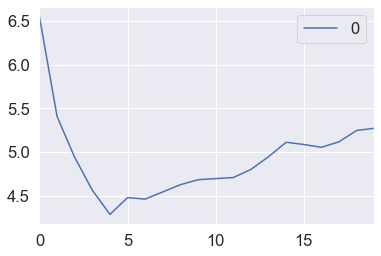

In [39]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

# The optimum number of neighbors was estimated to be 5 by plotting the elbow curve.

In [36]:
KNN_final = KNeighborsRegressor(n_neighbors = 5)
KNN_final.fit(X_tr,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [37]:
Mean_R2_KNN_CV = np.mean(cross_val_score(KNN_final, X_tr, y_train, cv=cv, scoring='r2'))
print('Mean r2 KNN CV: %f' %Mean_R2_KNN_CV)
      
Std_R2_KNN_CV = np.std(cross_val_score(KNN_final, X_tr, y_train, cv=cv, scoring='r2'))
print('std r2 KNN CV: %f' %Std_R2_GBR_CV)


Mean_MAE_KNN_CV = -np.mean(cross_val_score(KNN_final, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('Mean of mean absolute error KNN CV: %f' %Mean_MAE_KNN_CV)

Std_MAE_KNN_CV = np.std(cross_val_score(KNN_final, X_tr, y_train, cv=cv, scoring='neg_mean_absolute_error'))
print('std of Mean absolute KNN CV: %f' %Std_MAE_KNN_CV)

Mean r2 KNN CV: 0.699066
std r2 KNN CV: 0.090081
Mean of mean absolute error KNN CV: 4.237049
std of Mean absolute KNN CV: 0.655406


In [95]:
y_pred = KNN_final.predict(X_te)
error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
error

4.284511866652241

# The mean absolute error on CV set is 4.237 and RMSE on test set is 4.284

# On comparing the performance of the different algorithms on the test and cross validation set, it can be inferred that the Gradient Boost Regression algorithm is doing a better job at the market_value prediction.